In [20]:
#Importing Modules with Alias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [21]:
#Import CSV file
data=pd.read_csv("./GOOGL.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [22]:
#Converting Date datatype
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


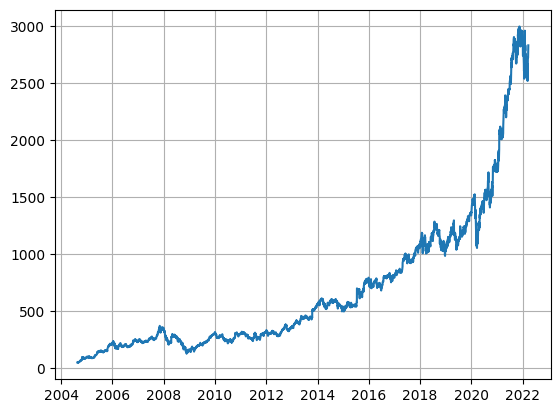

In [23]:
#Plotting the graph
x,y=data['Date'],data['Close']
plt.grid()
plt.plot(x,y)

In [24]:
#Splitting Train-Test
x=np.array(data.index).reshape(-1,1)
y=data['Close']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [25]:
#Feature Scalling
scaler=StandardScaler().fit(xtrain)

In [26]:
#Creating Module
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

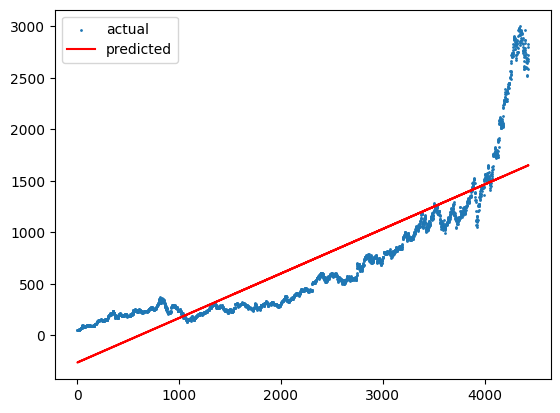

In [27]:
plt.scatter(xtrain.T[0],ytrain,label='actual',s=1)
plt.plot(xtrain.T[0],lm.predict(xtrain).T,label='predicted',c='red')
plt.legend()
plt.show()

In [28]:
score=f'''{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(ytrain,lm.predict(xtrain))}\t{r2_score(ytest,lm.predict(xtest))}
{'MSE'.ljust(10)}{mse(ytrain,lm.predict(xtrain))}\t{mse(ytest,lm.predict(xtest))}
'''
score

'Metric           Train                Test        \nr2_score  0.7270320936110208\t0.7220730138704481\nMSE       114324.85439586967\t113896.50557832266\n'